In [28]:
import pandas as pd
import numpy as np

In [29]:
url = 'https://raw.githubusercontent.com/aliciacaminero/Proyect_LEA/refs/heads/main/lego_marvel_sets.csv'
df = pd.read_csv(url)

In [30]:
df

,Código del Set,Nombre del Set,Año de Lanzamiento,PVP,Precio como Nuevo,Precio como Usado,Valoración de Usuarios
0,4529,4529: Iron Man,1 May 2012 - 31 Dec 2012 (8m),$14.99 | More,~€31.84,~€9.18,✭✭✭✭✩ 3.4 64 ratings
1,4530,4530: The Hulk,1 May 2012 - 31 Dec 2012 (8m),$14.99 | More,~€30.12,~€8.28,✭✭✭✩✩ 3.1 50 ratings 2 reviews
2,4597,4597: Captain America,1 May 2012 - 31 Dec 2012 (8m),$14.99 | More,~€38.33,~€11.54,✭✭✭✩✩ 3.1 38 ratings 2 reviews
3,6865,6865: Captain America's Avenging Cycle,1 May 2012 - 31 Jul 2013 (1y 2m 29d),$12.99 | More,~€29.19,~€11.58,✭✭✭✭✩ 3.5 332 ratings 21 reviews Brickset review
4,6866,6866: Wolverine's Chopper Showdown,1 May 2012 - 31 Dec 2013 (1y 8m),$19.99 | More,~€215.31,~€152.93,✭✭✭✭✩ 4.2 345 ratings 16 reviews
...,...,...,...,...,...,...,...
313,Código no disponible,PS4 Spider-Man,Año no disponible,PVP no disponible,Precio nuevo no disponible,Precio usado no disponible,NaN
314,Código no disponible,Classic Suit Miles Morales,Año no disponible,PVP no disponible,Precio nuevo no disponible,Precio usado no disponible,NaN
315,Código no disponible,Stormbreaker,Año no disponible,PVP no disponible,Precio nuevo no disponible,Precio usado no disponible,NaN
316,Código no disponible,Captain America's Shield,Año no disponible,PVP no disponible,Precio nuevo no disponible,Precio usado no disponible,NaN


In [31]:
# Reemplaza valores no convertibles por NaN
df['Código del Set'] = pd.to_numeric(df['Código del Set'], errors='coerce')

# 2. Rellenar NaN con 0 (o eliminar filas, si prefieres) -> mejor a Int64
#df['Código del Set'] = df['Código del Set'].fillna(0)

df['Código del Set'] = df['Código del Set'].astype('Int64')

In [32]:
df['Precio como Nuevo'] = df['Precio como Nuevo'].str.lstrip('~')
df['Precio como Usado'] = df['Precio como Usado'].str.lstrip('~')

df.rename(columns={
    'PVP': 'PVP $',
    'Precio como Nuevo': 'Precio como Nuevo €',
    'Precio como Usado': 'Precio como Usado €'
}, inplace=True)

In [33]:
# Filtrar las filas donde 'PVP $' contiene el símbolo '€'
filas_con_euro = df[df['PVP $'].str.contains('€', na=False)]

# Mostrar las filas filtradas
filas_con_euro

,Código del Set,Nombre del Set,Año de Lanzamiento,PVP $,Precio como Nuevo €,Precio como Usado €,Valoración de Usuarios
9,10781,10781: Spider-Man's Techno Trike,1 Jan 2022 - 31 Dec 2023 (1y 11m 28d),"$9.99, €9.99 | More",€12.14,Precio usado no disponible,✭✭✭✩✩ 3.0 44 ratings
10,10782,10782: Hulk vs. Rhino Truck Showdown,1 Jan 2022 - {t.b.a},"$19.99, €19.99 | More",Precio nuevo no disponible,Precio usado no disponible,✭✭✭✭✩ 3.3 70 ratings
11,10783,10783: Spider-Man at Doc Ock's Lab,1 Jan 2022 - 31 Dec 2022 (11m 29d),"$29.99, €29.99 | More",€38.58,€24.33,NaN
12,10784,10784: Spider-Man Webquarters Hangout,1 Jan 2022 - 31 Dec 2023 (1y 11m 28d),"$49.99, €49.99 | More",€47.13,Precio usado no disponible,✭✭✭✭✩ 3.3 21 ratings
13,10789,10789: Spider-Man's Car and Doc Ock,1 Mar 2023 - {t.b.a},"$9.99, €9.99 | More",Precio nuevo no disponible,Precio usado no disponible,✭✭✭✭✩ 3.4 27 ratings
...,...,...,...,...,...,...,...
243,76293,76293: Spider-Man 2024 Advent Calendar,1 Sep 2024 - 31 Dec 2024 (3m 29d),"$44.99, €34.99 | More",Precio nuevo no disponible,Precio usado no disponible,NaN
244,76294,76294: X-Men: The X-Mansion,Año no disponible,"$329.99, €329.99 | More",Precio nuevo no disponible,Precio usado no disponible,Brickset review
245,76295,76295: The Avengers Helicarrier,1 Aug 2024 - {t.b.a},"$79.99, €79.99 | More",Precio nuevo no disponible,Precio usado no disponible,Brickset review
247,76297,76297: Dancing Groot,1 Aug 2024 - {t.b.a},"$44.99, €44.99 | More",Precio nuevo no disponible,Precio usado no disponible,NaN


In [34]:
tasa_conversion = 1.10

# Limpiar la columna 'Precio como Nuevo' y transformar a dólares
df['Precio como Nuevo €'] = df['Precio como Nuevo €'].replace('Precio nuevo no disponible', np.nan)
df['Precio como Nuevo €'] = df['Precio como Nuevo €'].str.lstrip('€')
df['Precio como Nuevo $'] = df['Precio como Nuevo €'].astype(float) * tasa_conversion

# Limpiar la columna 'Precio como Usado' y transformar a dólares
df['Precio como Usado €'] = df['Precio como Usado €'].replace('Precio usado no disponible', np.nan)
df['Precio como Usado €'] = df['Precio como Usado €'].str.lstrip('€')
df['Precio como Usado $'] = df['Precio como Usado €'].astype(float) * tasa_conversion

# Adecuar columna PVP $ -> en este caso no hay filas que se queden con el simbolo del €
# Adecuar columna PVP $
df['PVP $'] = df['PVP $'].replace('PVP no disponible', np.nan)
df['PVP $'] = df['PVP $'].str.lstrip('$')
df['PVP $'] = df['PVP $'].str.split(' | ').str[0]
df['PVP $'] = df['PVP $'].str.replace(',', '', regex=False)
df['PVP $'] = df['PVP $'].astype(float)

In [35]:
df.head(10)

,Código del Set,Nombre del Set,Año de Lanzamiento,PVP $,Precio como Nuevo €,Precio como Usado €,Valoración de Usuarios,Precio como Nuevo $,Precio como Usado $
0,4529,4529: Iron Man,1 May 2012 - 31 Dec 2012 (8m),14.99,31.84,9.18,✭✭✭✭✩ 3.4 64 ratings,35.024,10.098
1,4530,4530: The Hulk,1 May 2012 - 31 Dec 2012 (8m),14.99,30.12,8.28,✭✭✭✩✩ 3.1 50 ratings 2 reviews,33.132,9.108
2,4597,4597: Captain America,1 May 2012 - 31 Dec 2012 (8m),14.99,38.33,11.54,✭✭✭✩✩ 3.1 38 ratings 2 reviews,42.163,12.694
3,6865,6865: Captain America's Avenging Cycle,1 May 2012 - 31 Jul 2013 (1y 2m 29d),12.99,29.19,11.58,✭✭✭✭✩ 3.5 332 ratings 21 reviews Brickset review,32.109,12.738
4,6866,6866: Wolverine's Chopper Showdown,1 May 2012 - 31 Dec 2013 (1y 8m),19.99,215.31,152.93,✭✭✭✭✩ 4.2 345 ratings 16 reviews,236.841,168.223
5,6867,6867: Loki's Cosmic Cube Escape,1 May 2012 - 31 Dec 2013 (1y 8m),19.99,50.23,23.48,✭✭✭✭✩ 3.8 329 ratings 10 reviews Brickset review,55.253,25.828
6,6868,6868: Hulk's Helicarrier Breakout,1 May 2012 - 31 Dec 2013 (1y 8m),49.99,76.28,43.84,✭✭✭✭✩ 3.7 212 ratings 8 reviews Brickset review,83.908,48.224
7,6869,6869: Quinjet Aerial Battle,1 May 2012 - 31 Dec 2013 (1y 8m),69.99,106.15,58.25,✭✭✭✭✩ 4.2 229 ratings 8 reviews Brickset review,116.765,64.075
8,6873,6873: Spider-Man's Doc Ock Ambush,1 Aug 2012 - 31 Dec 2013 (1y 4m 30d),29.99,52.67,32.29,✭✭✭✭✩ 3.6 127 ratings 7 reviews,57.937,35.519
9,10781,10781: Spider-Man's Techno Trike,1 Jan 2022 - 31 Dec 2023 (1y 11m 28d),9.99,12.14,NaN,✭✭✭✩✩ 3.0 44 ratings,13.354,NaN


In [36]:
url2 = 'https://raw.githubusercontent.com/aliciacaminero/Proyect_LEA/refs/heads/main/lego_marvel_sets_dl.csv'
df_2 = pd.read_csv(url2)

In [37]:
df_reducido = df_2[['Number', 'YearFrom', 'SetName']]

In [38]:
df_reducido.loc[:, 'Number'] = pd.to_numeric(df_reducido['Number'],errors='coerce')

df_reducido.dropna(subset=['Number'], inplace=True)

df_reducido.loc[:, 'Number'] = df_reducido['Number'].astype(int)

C:\Users\Ema\AppData\Local\Temp\ipykernel_5256\69839567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido.dropna(subset=['Number'], inplace=True)


In [39]:
merged_M_df = pd.merge(df, df_reducido, left_on='Código del Set', right_on='Number', how='left')

In [40]:
#merged_M_df.loc[:, 'YearFrom'] = merged_M_df['YearFrom'].fillna(0)  # hay que sustituir NaN por un cero si quieres que pase a int -> si quieres mantener NaN Int64
merged_M_df['YearFrom'] = merged_M_df['YearFrom'].astype('Int64')

In [41]:
merged_M_df.drop(columns=['Precio como Nuevo €', 'Precio como Usado €', 'Number'], inplace=True)

In [42]:
# Crear la nueva columna 'FinalSetName' usando fillna -> para que principalmente aparezca SetName pero si aqui hay un NaN sea sustituido por Nombre del Set
merged_M_df['FinalSetName'] = merged_M_df['SetName'].fillna(merged_M_df['Nombre del Set'])

In [43]:
merged_M_df.drop(columns=['Nombre del Set', 'SetName'], inplace=True)

In [44]:
new_orden = ['Código del Set', 'FinalSetName', 'Año de Lanzamiento', 'YearFrom', 'PVP $', 'Precio como Nuevo $', 'Precio como Usado $', 'Valoración de Usuarios']

M_df = merged_M_df[new_orden]

In [45]:
M_df.rename(columns={
    'FinalSetName': 'Nombre del Set',
    'Año de Lanzamiento': 'Fecha de Lanzamiento',
    'YearFrom': 'Año de Lanzamiento'
}, inplace=True)

In [46]:
tipos_columnas = M_df.dtypes

tipos_columnas

Código del Set             object
Nombre del Set             object
Fecha de Lanzamiento       object
Año de Lanzamiento          Int64
PVP $                     float64
Precio como Nuevo $       float64
Precio como Usado $       float64
Valoración de Usuarios     object
dtype: object

In [47]:
# SEGUNDA PARTE

# Calculo el porcentaje de cambio en relación al precio como nuevo y como usado
# Creo dos columnas
M_df['Porcentaje como nuevo'] = ((M_df['Precio como Nuevo $'] - M_df['PVP $']) / M_df['PVP $']) * 100
M_df['Porcentaje como usado'] = ((M_df['Precio como Usado $'] - M_df['PVP $']) / M_df['PVP $']) * 100

M_df['Porcentaje como nuevo'] = M_df['Porcentaje como nuevo'].round(2)
M_df['Porcentaje como usado'] = M_df['Porcentaje como usado'].round(2)

In [48]:
tipos_columnas = M_df.dtypes

tipos_columnas

Código del Set             object
Nombre del Set             object
Fecha de Lanzamiento       object
Año de Lanzamiento          Int64
PVP $                     float64
Precio como Nuevo $       float64
Precio como Usado $       float64
Valoración de Usuarios     object
Porcentaje como nuevo     float64
Porcentaje como usado     float64
dtype: object

In [49]:
mean_porcentaje_nuevo = M_df['Porcentaje como nuevo'].mean().round(2)
print(mean_porcentaje_nuevo)

mean_porcentaje_usado = M_df['Porcentaje como usado'].mean().round(2)
print(mean_porcentaje_usado)

70.24
2.32


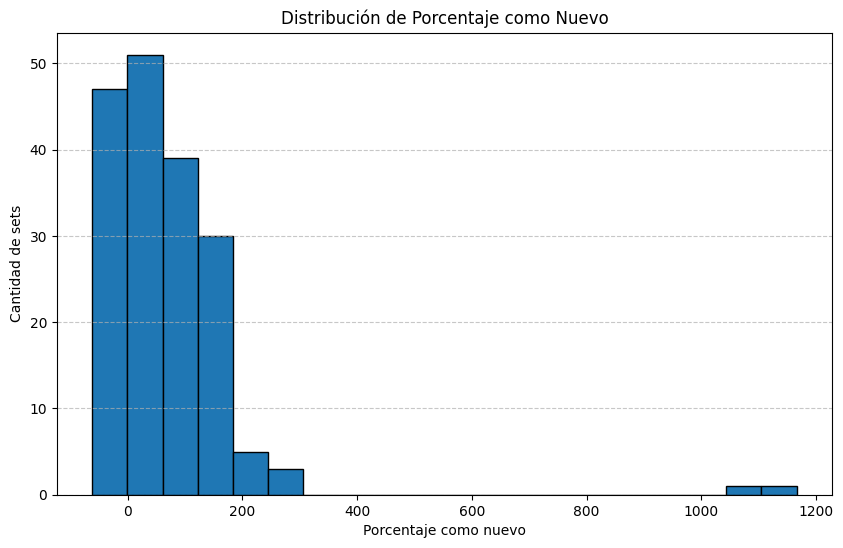

In [50]:
import matplotlib.pyplot as plt

# Crear un gráfico de distribución para la columna "Porcentaje como usado"
plt.figure(figsize=(10, 6))
plt.hist(M_df['Porcentaje como nuevo'].dropna(), bins=20, edgecolor='black')
plt.title('Distribución de Porcentaje como Nuevo')
plt.xlabel('Porcentaje como nuevo')
plt.ylabel('Cantidad de sets')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

In [51]:
# Identifico el set con la mayor revalorización en "Porcentaje como nuevo"
max_reval_new = M_df.loc[M_df['Porcentaje como nuevo'].idxmax()]

# Muestro el set con la mayor revalorización
max_reval_new[['Código del Set', 'Nombre del Set', 'Año de Lanzamiento', 'PVP $', 'Precio como Nuevo $', 'Porcentaje como nuevo']]

Código del Set                               <NA>
Nombre del Set           Rocket Raccoon's Warbird
Año de Lanzamiento                           <NA>
PVP $                                       39.99
Precio como Nuevo $                       506.319
Porcentaje como nuevo                     1166.11
Name: 304, dtype: object

In [52]:
# Ordenar el DataFrame por "Porcentaje como nuevo" en orden descendente y seleccionar los 10 primeros
top_10_revalorizados = M_df.sort_values(by='Porcentaje como nuevo', ascending=False).head(10).reset_index()

# Mostrar las columnas relevantes
top_10_revalorizados = top_10_revalorizados[['Código del Set', 'Nombre del Set', 'Año de Lanzamiento', 'PVP $', 'Precio como Nuevo $', 'Porcentaje como nuevo']]

top_10_revalorizados

,Código del Set,Nombre del Set,Año de Lanzamiento,PVP $,Precio como Nuevo $,Porcentaje como nuevo
0,<NA>,Rocket Raccoon's Warbird,<NA>,39.99,506.319,1166.11
1,6866,Wolverine's Chopper Showdown,2012,19.99,236.841,1084.80
2,30167,Iron Man vs. Fighting Drone,2013,4.99,19.833,297.45
3,5002145,Rocket Raccoon,2014,4.99,19.646,293.71
4,76039,Ant-Man Final Battle,2015,19.99,69.883,249.59
5,76058,Spider-Man: Ghost Rider Team-Up,2016,19.99,67.243,236.38
6,76015,Doc Ock Truck Heist,2014,19.99,61.259,206.45
7,76113,Spider-Man Bike Rescue,2019,19.99,59.609,198.19
8,76019,Starblaster Showdown,2014,19.99,57.431,187.30
9,76081,The Milano vs. The Abilisk,2017,49.99,143.517,187.09


In [54]:
M_df.to_csv("./M_df.csv")

In [55]:
top_10_revalorizados.to_csv("./top_marvel.csv")